In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium
import numpy as np

In [2]:
from pycalphad.tests.datasets import *
dbf = Database(ROSE_TDB)

In [3]:
eq2 = equilibrium(dbf, ['H', 'HE', 'LI'], ['TEST'],
                 {v.X('LI'): 0.3, v.MU('H'): -7385.549841,
                  v.T: 1273, v.P: 1e5}, verbose=True, calc_opts={'pdens': 10})
print(eq2)

Components: H HE LI
Phases: build_callables [N, P, T]
TEST 
[done]
build_callables [N, P, T]
('included_composition_indices', array([ 2, -1], dtype=int32))
('best_guess_simplex', array([1, 2], dtype=int32))
('trial_simplices', array([[1, 2],
       [1, 2]], dtype=int32))
('f_contig_trial', array([[ 0.,  1.],
       [ 1.,  1.]]))
('rhs', array([ 0.3,  1. ]))
('fractions', array([ 0.7,  0.3]))
('f_contig_trial', array([[ 0.,  1.],
       [ 1.,  1.]]))
('rhs', array([ 0.3,  1. ]))
('fractions', array([ 0.7,  0.3]))
('smallest_fractions', array([ 0.3,  0.3]))
('candidate_tieline', array([[ 1.,  0.],
       [ 0.,  1.]]))
('rhs', array([  1.00000000e+10,   1.00000000e+10]))
('candidate_potentials', array([  1.00000000e+10,   1.00000000e+10]))
('min_df', array(30))
('min_df_value', array(-10000007271.047592))
('f_contig_trial', array([[ 0.55555556,  1.        ],
       [ 1.        ,  1.        ]]))
('rhs', array([ 0.3,  1. ]))
('fractions', array([ 1.575, -0.575]))
('f_contig_trial', array([[

In [4]:
eq2.MU

<xarray.DataArray 'MU' (N: 1, P: 1, T: 1, MU_H: 1, X_LI: 1, component: 3)>
array([[[[[[-7385.549841, -7385.536533, -7385.53858 ]]]]]])
Coordinates:
  * MU_H       (MU_H) float64 -7.386e+03
  * N          (N) float64 1.0
  * P          (P) float64 1e+05
  * T          (T) float64 1.273e+03
  * X_LI       (X_LI) float64 0.3
  * component  (component) <U2 'H' 'HE' 'LI'

ConditionError: There are no phases in the Database that can be active with components []

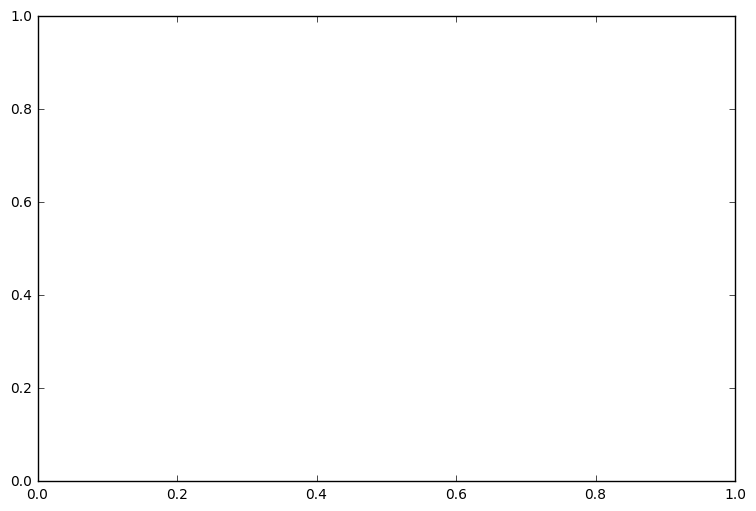

In [5]:
%matplotlib inline
from pycalphad import calculate, Database
from pycalphad.plot.utils import phase_legend
import numpy as np
from pycalphad.tests.datasets import ISSUE43_TDB
import matplotlib.pyplot as plt

my_phases =  ['FCC_A1', 'GAMMA_PRIME']

legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(dbf, ['AL', 'NI', 'CR', 'VA'], name,
                     T=1273, P=101325, pdens=500)
    gm = result.GM.isel(T=0,P=0) - np.sum([-140000, -47243.21708006, -90400.16978886] * result.X.isel(T=0,P=0), axis=1)
    ax.scatter(result.X.isel(T=0,P=0).sel(component='CR'), gm,
               marker='.', s=5, color=colorlist[name.upper()])
#ax.set_xlim((0.6, 1))
ax.set_ylim((-500, 1000))
#plt.plot([0,1], [0, 0])
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()